In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Numpy nd-array

In [4]:
a = np.arange(1, 25, dtype=int)
print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)

print(a.size)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
int64
1
(24,)
24


In [ ]:
a = np.arange(1, 25, dtype=int).reshape(4, -1)

print(a)

print(a.dtype)
print(a.ndim)
print(a.shape)

print(a.size)   # total number of elements

print(len(a))  # only first dimension 

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
int64
2
(4, 6)
24
(48, 8)
4


### Random

In [2]:
d = np.random.randn(40000)

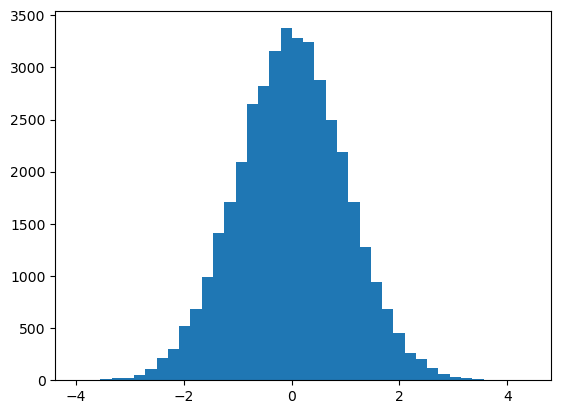

In [3]:
plt.hist(d, bins=40)
plt.show()

### Polynomials

In [5]:
f = np.polynomial.Polynomial([0, 1, 1])

In [6]:
x = np.linspace(-2, 2, 100)
y = f(x)

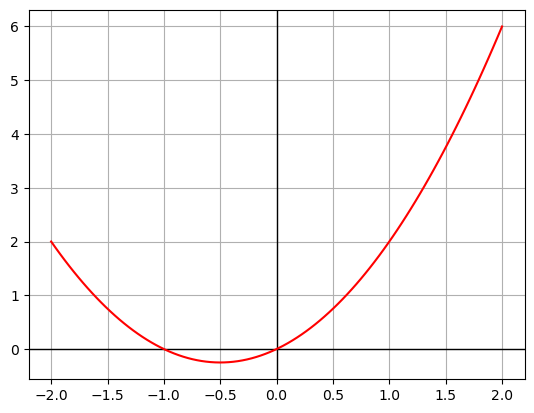

In [7]:
plt.axhline(0, c='k', lw=1)
plt.axvline(0, c='k', lw=1)
plt.grid()
plt.plot(x, y, c='r')
plt.show()

### Linear Regression

##### Random data

In [49]:
rng = np.random.default_rng()
x = np.arange(10)
y = np.arange(10) + rng.standard_normal(10)

##### Legacy polynomial module

In [86]:
coefs = np.polyfit(x, y, deg=1)
fitted = np.poly1d(coefs)
coefs = coefs[::-1]
coefs

array([0.45556511, 0.89373928])

##### New polynomial package

In [90]:
fitted = np.polynomial.Polynomial.fit(x, y, deg=1).convert()
coefs = fitted.coef
coefs

array([0.45556511, 0.89373928])

##### Scikit Learn Linear Model

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x.reshape((len(x),-1))
model.fit(X, y)
coefs = np.array([model.intercept_] + list(model.coef_))
fitted = lambda x: model.predict(x.reshape((len(x),-1)))
coefs

array([0.45556511, 0.89373928])

#### Plot

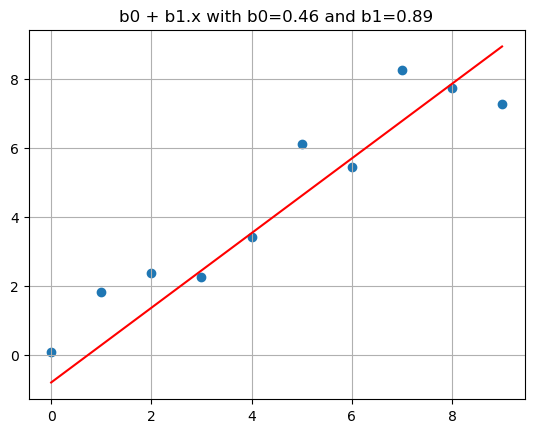

In [89]:
plt.scatter(x, y)
plt.plot(x, fitted1(x), color='r')
plt.title(f'b0 + b1.x with b0={coefs[0]:.2f} and b1={coefs[1]:.2f}')
plt.grid()
plt.show()

### View vs Copy

In [34]:
a = np.linspace(0, 10, 11, dtype=np.int32)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [35]:
part = a[3:6]
part

array([3, 4, 5], dtype=int32)

In [36]:
part[0] = 99
part

array([99,  4,  5], dtype=int32)

In [37]:
a

array([ 0,  1,  2, 99,  4,  5,  6,  7,  8,  9, 10], dtype=int32)